In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# Import the store data sets
df = pd.read_csv("storedata.csv")

### Exploratory data Analysis

In [3]:
df.shape # (rows, columns)

(136, 19)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Town                136 non-null    object
 1   Country             136 non-null    object
 2   Store ID            136 non-null    int64 
 3   Manager name        136 non-null    object
 4   Staff               136 non-null    int64 
 5   Floor Space         136 non-null    int64 
 6   Window              136 non-null    int64 
 7   Car park            136 non-null    object
 8   Demographic score   136 non-null    int64 
 9   Location            136 non-null    object
 10  40min population    136 non-null    int64 
 11  30 min population   136 non-null    int64 
 12  20 min population   136 non-null    int64 
 13  10 min population   136 non-null    int64 
 14  Store age           136 non-null    int64 
 15  Clearance space     136 non-null    int64 
 16  Competition number  136 no

In [5]:
df.columns

Index(['Town', 'Country', 'Store ID', 'Manager name', 'Staff', 'Floor Space',
       'Window', 'Car park', 'Demographic score', 'Location',
       '40min population', '30 min population', '20 min population',
       '10 min population', 'Store age', 'Clearance space',
       'Competition number', 'Competition score', 'Performance'],
      dtype='object')

In [6]:
df.describe()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
count,136.000000,136.000000,136.000000,136.000000,136.000000,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000
mean,52172.580882,13.352941,15024.095588,112.044118,14.463235,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824
std,28725.990237,56.592439,2761.801921,6.884085,2.874944,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258
min,1437.000000,-2.000000,10072.000000,100.000000,10.000000,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000
25%,24707.250000,6.000000,12793.000000,106.750000,12.000000,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000
50%,56011.500000,7.000000,14596.500000,111.000000,14.500000,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000
75%,76870.500000,8.000000,17543.750000,118.000000,17.000000,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000
max,99854.000000,600.000000,19869.000000,124.000000,19.000000,1.997044e+06,1.929089e+06,1.723395e+06,1.426533e+06,11.000000,408.000000,19.000000,19.000000


In [7]:
df.describe(include="all")

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
count,136,136,136.000000,136,136.000000,136.000000,136.000000,136,136.000000,136,1.360000e+02,1.360000e+02,1.360000e+02,1.360000e+02,136.000000,136.000000,136.000000,136.000000,136
unique,136,2,NaN,118,NaN,NaN,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Swinton (Greater Manchester),UK,NaN,Sarah,NaN,NaN,NaN,Yes,NaN,Shopping Centre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,1,134,NaN,3,NaN,NaN,NaN,94,NaN,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69
mean,NaN,NaN,52172.580882,NaN,13.352941,15024.095588,112.044118,NaN,14.463235,NaN,1.487374e+06,1.249870e+06,1.134533e+06,1.066118e+06,6.529412,262.426471,14.463235,14.808824,NaN
std,NaN,NaN,28725.990237,NaN,56.592439,2761.801921,6.884085,NaN,2.874944,NaN,2.804989e+05,2.160875e+05,1.490280e+05,8.884585e+04,2.815147,51.724288,2.895483,2.955258,NaN
min,NaN,NaN,1437.000000,NaN,-2.000000,10072.000000,100.000000,NaN,10.000000,NaN,1.030405e+06,1.000653e+06,1.000214e+06,1.000002e+06,2.000000,200.000000,10.000000,10.000000,NaN
25%,NaN,NaN,24707.250000,NaN,6.000000,12793.000000,106.750000,NaN,12.000000,NaN,1.254949e+06,1.057284e+06,1.012573e+06,1.005593e+06,4.000000,220.750000,12.000000,13.000000,NaN
50%,NaN,NaN,56011.500000,NaN,7.000000,14596.500000,111.000000,NaN,14.500000,NaN,1.516338e+06,1.214459e+06,1.077542e+06,1.033228e+06,6.000000,249.000000,15.000000,15.000000,NaN
75%,NaN,NaN,76870.500000,NaN,8.000000,17543.750000,118.000000,NaN,17.000000,NaN,1.696352e+06,1.396967e+06,1.203077e+06,1.090349e+06,9.000000,292.250000,17.000000,18.000000,NaN


In [8]:
df.head()

,Town,Country,Store ID,Manager name,Staff,Floor Space,Window,Car park,Demographic score,Location,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score,Performance
0,Swinton (Greater Manchester),UK,1437,Roger,9,18526,121,Yes,10,Retail Park,1288374,1138224,1006986,1002340,3,238,16,16,Good
1,Stamford,UK,1544,Ella,8,18569,121,Yes,11,Shopping Centre,1086225,1015321,1012182,1008436,4,384,15,19,Good
2,Skipton,UK,2039,Valentina,-2,12288,105,No,12,Retail Park,1595638,1281661,1104490,1011395,11,219,13,18,Bad
3,Stratton,UK,2055,Antonia,7,17092,117,No,14,High Street,1179395,1022959,1009496,1002169,5,261,15,12,Bad
4,Shepperton,UK,2141,Gabriel,7,11307,103,No,18,Retail Park,1398558,1085170,1003137,1002513,7,200,19,13,Bad


In [9]:
# Let's find out how many of each class there
df["Performance"].value_counts()

Good    69
Bad     67
Name: Performance, dtype: int64

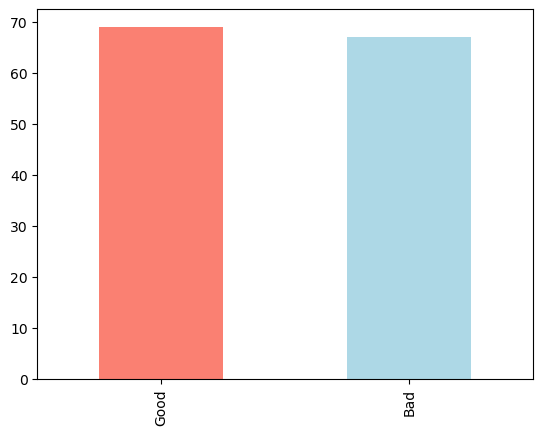

In [10]:
df["Performance"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
# Are there any missing values?
df.isna().sum()

Town                  0
Country               0
Store ID              0
Manager name          0
Staff                 0
Floor Space           0
Window                0
Car park              0
Demographic score     0
Location              0
40min population      0
30 min population     0
20 min population     0
10 min population     0
Store age             0
Clearance space       0
Competition number    0
Competition score     0
Performance           0
dtype: int64

In [12]:
df.Staff.value_counts()

 7      29
 5      29
 6      29
 9      28
 8      18
-2       1
 300     1
 600     1
Name: Staff, dtype: int64

In [13]:
# Compare target column with sex column
pd.crosstab(df.Performance, df.Staff)

Staff,-2,5,6,7,8,9,300,600
Performance,,,,,,,,
Bad,1,22,17,15,5,7,0,0
Good,0,7,12,14,13,21,1,1


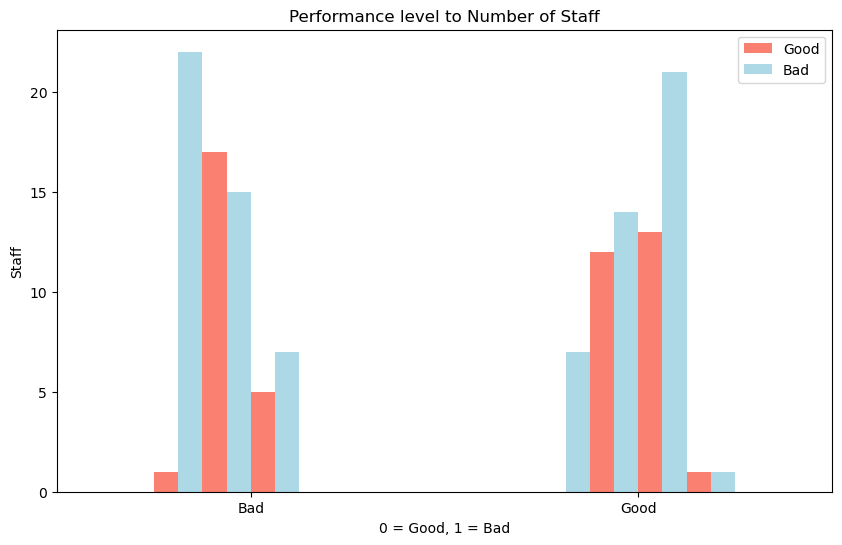

In [14]:
# Create a plot of crosstab
pd.crosstab(df.Performance, df.Staff).plot(kind="bar",
                                    figsize=(10, 6),
                                    color=["salmon", "lightblue"])

plt.title("Performance level to Number of Staff")
plt.xlabel("0 = Good, 1 = Bad")
plt.ylabel("Staff")
plt.legend(["Good", "Bad"]);
plt.xticks(rotation=0);

In [15]:
# Make a correlation matrix
df.corr()

,Store ID,Staff,Floor Space,Window,Demographic score,40min population,30 min population,20 min population,10 min population,Store age,Clearance space,Competition number,Competition score
Store ID,1.000000,0.069173,0.014658,0.014756,0.174201,0.070286,0.015162,0.058195,0.072882,0.008830,0.072401,0.156863,-0.077005
Staff,0.069173,1.000000,0.076039,0.077630,-0.057831,-0.098366,-0.024631,-0.056310,-0.006601,-0.172655,0.110591,0.034571,0.123579
Floor Space,0.014658,0.076039,1.000000,0.999208,0.038187,0.051918,-0.032199,-0.046161,-0.096698,-0.049285,0.627324,0.073559,0.091447
Window,0.014756,0.077630,0.999208,1.000000,0.038633,0.053228,-0.028688,-0.042441,-0.091651,-0.048992,0.628509,0.074034,0.104551
Demographic score,0.174201,-0.057831,0.038187,0.038633,1.000000,0.036694,-0.007616,0.053498,0.099587,-0.014967,0.041849,-0.100716,-0.072325
40min population,0.070286,-0.098366,0.051918,0.053228,0.036694,1.000000,0.624732,0.516682,0.432857,-0.191329,-0.018234,-0.004326,0.040554
30 min population,0.015162,-0.024631,-0.032199,-0.028688,-0.007616,0.624732,1.000000,0.766158,0.667031,-0.098829,-0.093048,-0.054191,0.046811
20 min population,0.058195,-0.056310,-0.046161,-0.042441,0.053498,0.516682,0.766158,1.000000,0.807882,-0.046910,-0.085887,-0.081947,0.008492
10 min population,0.072882,-0.006601,-0.096698,-0.091651,0.099587,0.432857,0.667031,0.807882,1.000000,-0.103815,-0.053129,-0.039108,0.068781
Store age,0.008830,-0.172655,-0.049285,-0.048992,-0.014967,-0.191329,-0.098829,-0.046910,-0.103815,1.000000,-0.037935,-0.063024,-0.109725


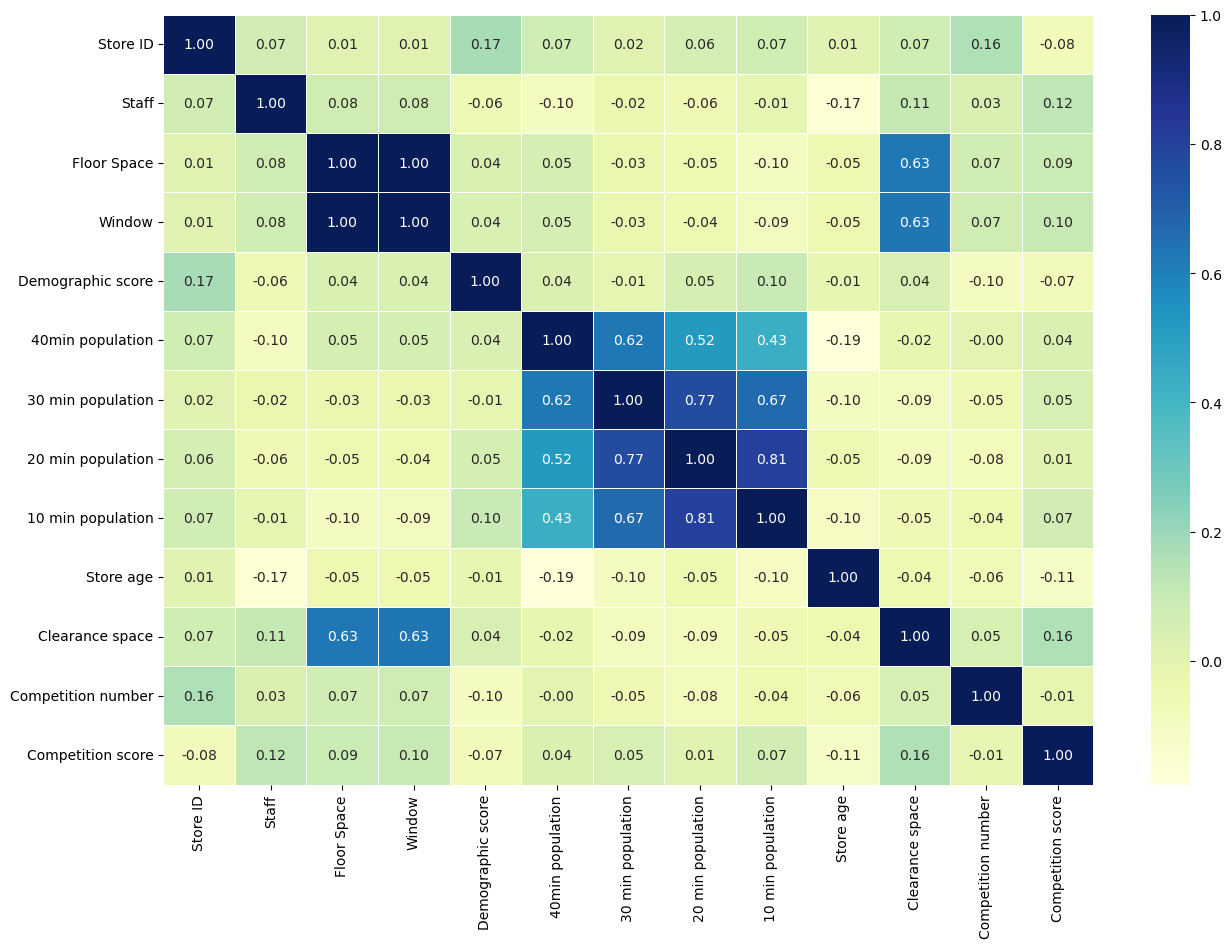

In [16]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

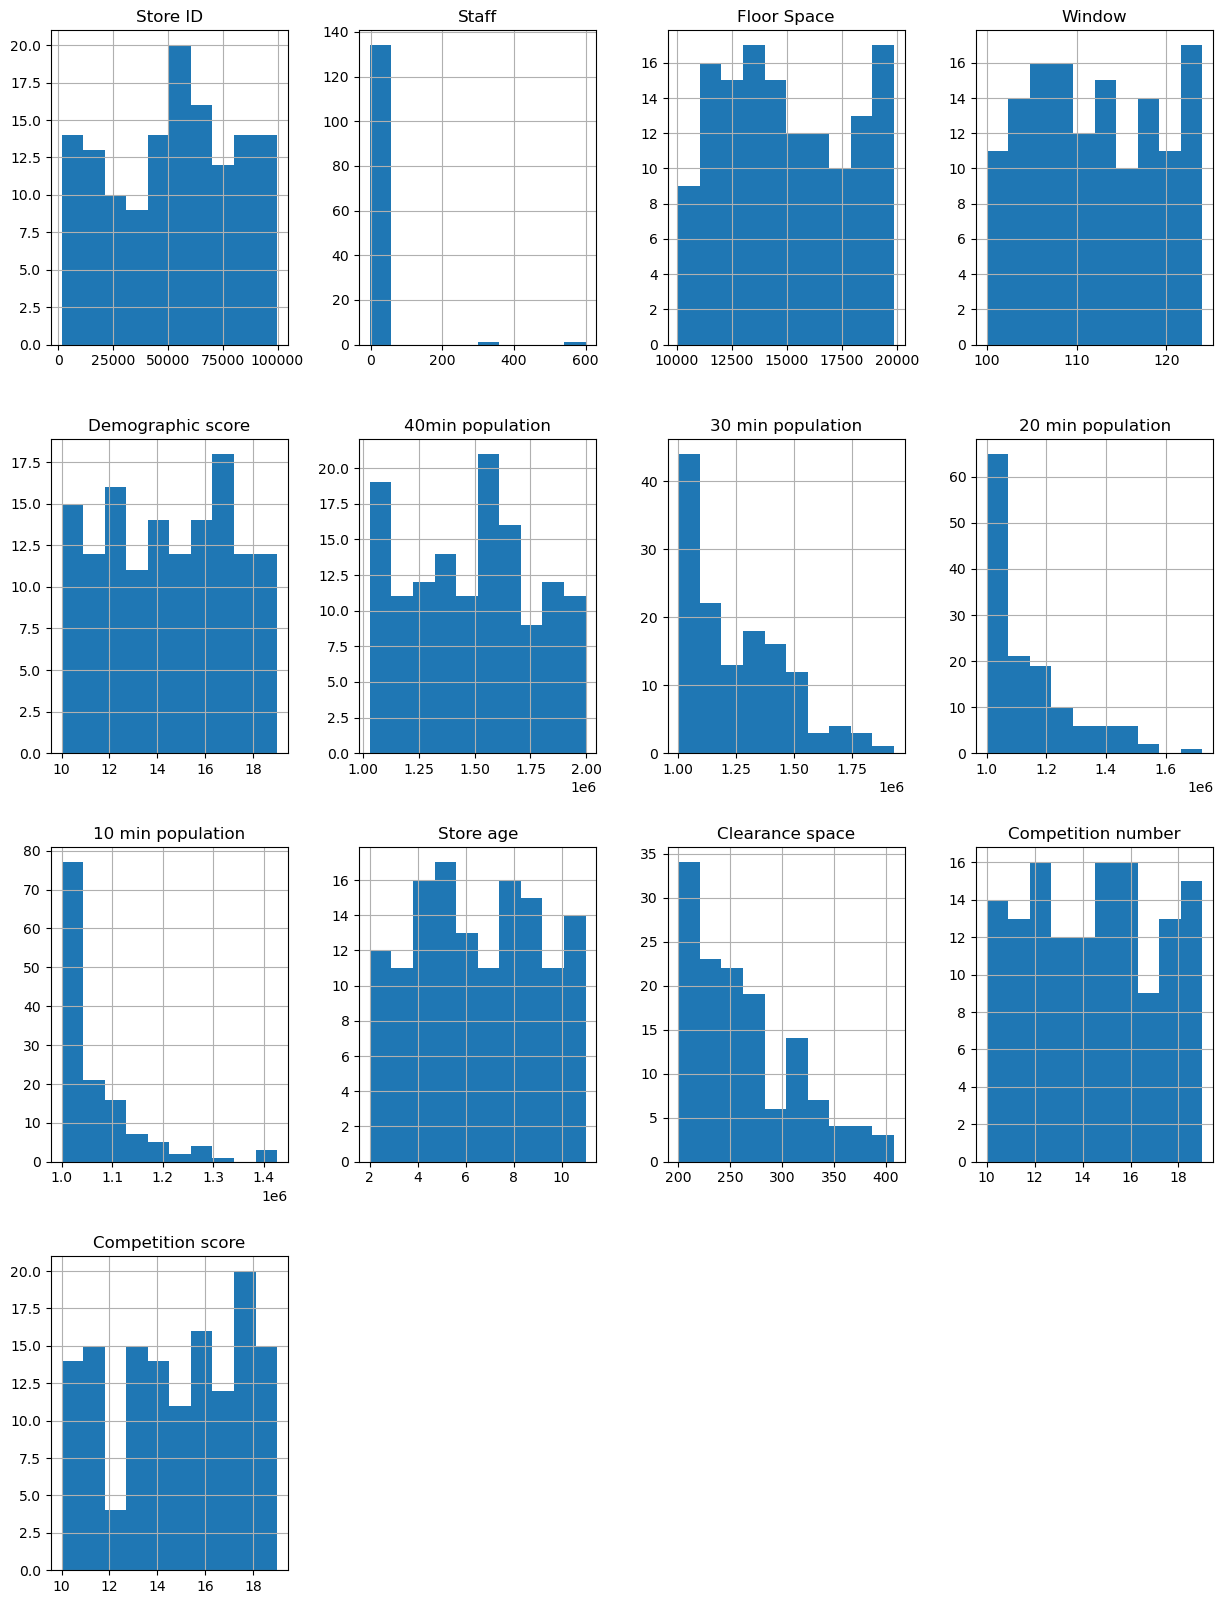

In [17]:
#Plot the distribution of our data
df.hist(figsize = (15,20));

 ## Data Cleaning

In [18]:
# Remove negative values in 'Staff' column (example of data cleaning)
df = df[df['Staff'] >= 0]

# Drop columns that won't contribute to the project
df_cleaned = df.drop(['Town', 'Country', 'Store ID', 'Manager name'], axis=1)


## Encode Categorical Variables and Normalize

In [19]:
from sklearn.preprocessing import LabelEncoder
# Convert categorical columns to numerical using Label Encoding
label_encoder = LabelEncoder()
df_cleaned['Car park'] = label_encoder.fit_transform(df_cleaned['Car park'])
df_cleaned['Performance'] = label_encoder.fit_transform(df_cleaned['Performance'])
df_cleaned['Location'] = label_encoder.fit_transform(df_cleaned['Location'])

# Normalize numeric columns
scaler = MinMaxScaler()
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_cols] = scaler.fit_transform(df_cleaned[numeric_cols])


## Split Data into Features and Target

In [20]:
X = df_cleaned.drop('Performance', axis=1)
y = df_cleaned['Performance']


## Split Data into Training and Testing Sets

In [21]:
# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Training the Model

In [22]:
# Define models with initial parameters
log_reg = LogisticRegression(max_iter=100)
dec_tree = DecisionTreeClassifier()
nn = MLPClassifier(max_iter=1000)

# Define parameter grids for GridSearchCV
param_grid_lr = {'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'], 'solver': ['lbfgs']}
param_grid_dt = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 3, 5]}
param_grid_nn = {'hidden_layer_sizes': [(50, 30), (64, 32)], 'solver': ['adam'], 'learning_rate_init': [0.01, 0.1]}

# Perform GridSearchCV for each model
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_dt = GridSearchCV(dec_tree, param_grid_dt, cv=5, scoring='accuracy')
grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=5, scoring='accuracy')

# Fit the models
grid_search_lr.fit(X_train, y_train)
grid_search_dt.fit(X_train, y_train)
grid_search_nn.fit(X_train, y_train)

# Get the best models
best_lr = grid_search_lr.best_estimator_
best_dt = grid_search_dt.best_estimator_
best_nn = grid_search_nn.best_estimator_

# Predict on the test set
y_pred_lr = best_lr.predict(X_test)
y_pred_dt = best_dt.predict(X_test)
y_pred_nn = best_nn.predict(X_test)



In [23]:
dec_tree = DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, min_samples_split=8)

In [24]:
neural_net = MLPClassifier(hidden_layer_sizes=(64, 32), solver='adam', learning_rate_init=0.1, max_iter=1000)
neural_net.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(64, 32), learning_rate_init=0.1,
              max_iter=1000)

## Evaluate the Model

In [29]:
# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)

## Confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

## Classification report
class_report_lr = classification_report(y_test, y_pred_lr)


print(accuracy_lr, conf_matrix_lr, class_report_lr)


0.6296296296296297 [[10  5]
 [ 5  7]]               precision    recall  f1-score   support

         0.0       0.67      0.67      0.67        15
         1.0       0.58      0.58      0.58        12

    accuracy                           0.63        27
   macro avg       0.62      0.62      0.62        27
weighted avg       0.63      0.63      0.63        27



In [27]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)



print(accuracy_dt, conf_matrix_dt, class_report_dt) 

0.5185185185185185 [[9 6]
 [7 5]]               precision    recall  f1-score   support

         0.0       0.56      0.60      0.58        15
         1.0       0.45      0.42      0.43        12

    accuracy                           0.52        27
   macro avg       0.51      0.51      0.51        27
weighted avg       0.51      0.52      0.52        27



In [28]:
accuracy_nn = accuracy_score(y_test, y_pred_nn)
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
class_report_nn = classification_report(y_test, y_pred_nn)

print(accuracy_nn, conf_matrix_nn, class_report_nn)

0.6666666666666666 [[10  5]
 [ 4  8]]               precision    recall  f1-score   support

         0.0       0.71      0.67      0.69        15
         1.0       0.62      0.67      0.64        12

    accuracy                           0.67        27
   macro avg       0.66      0.67      0.66        27
weighted avg       0.67      0.67      0.67        27



In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

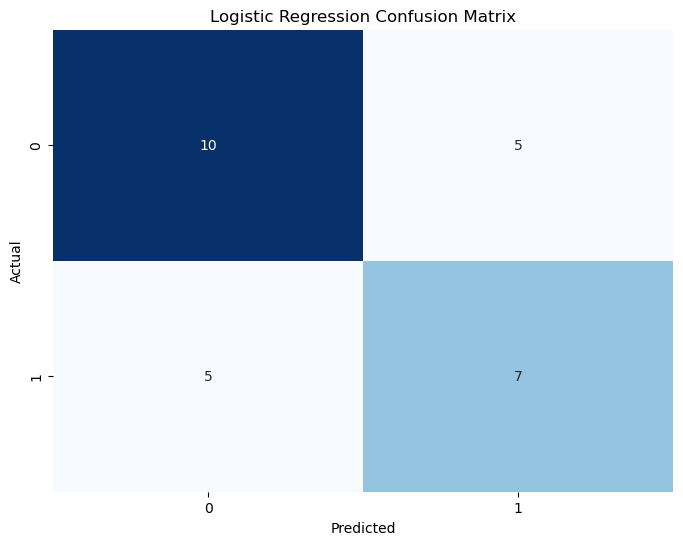

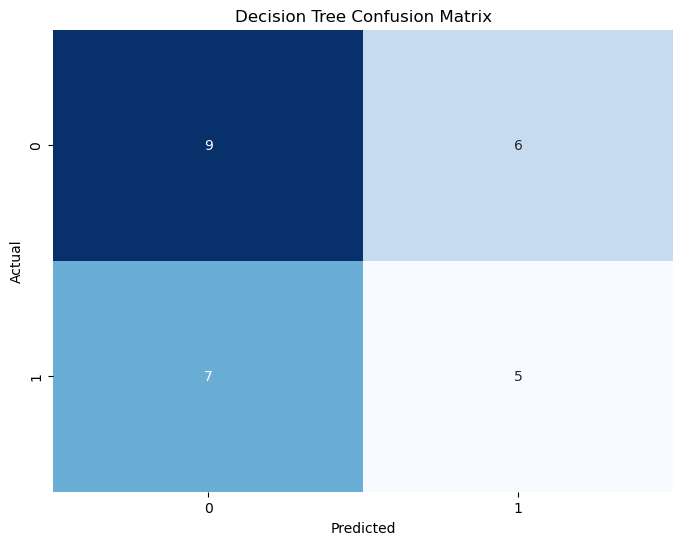

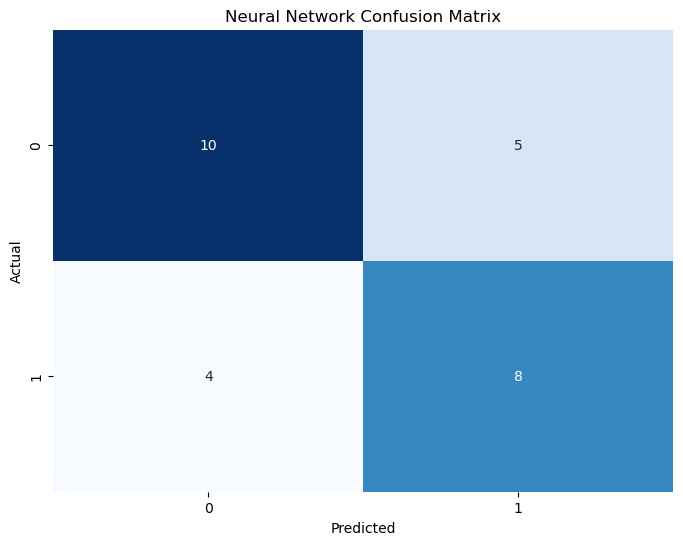

In [33]:
# Confusion matrices
plot_confusion_matrix(conf_matrix_lr, "Logistic Regression Confusion Matrix")
plot_confusion_matrix(conf_matrix_dt, "Decision Tree Confusion Matrix")
plot_confusion_matrix(conf_matrix_nn, "Neural Network Confusion Matrix")

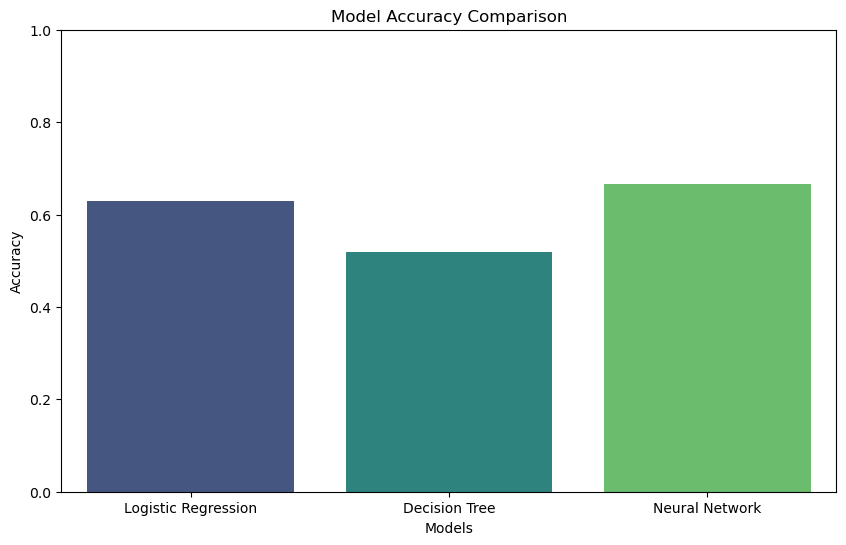

In [34]:
# Model accuracies
models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [accuracy_lr, accuracy_dt, accuracy_nn]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()